In [2]:
import numpy as np
import pandas as pd

In [3]:
path_to_dataset = "./r42short/"

In [23]:
log_types = ["device", "email", "file", "logon", "http"]
log_fields_list = [
    ["date", "user", "activity"],
    ["date", "user", "to", "cc", "bcc"],
    ["date", "user", "filename"],
    ["date", "user", "activity"],
    ["date", "user", "url"],
]

In [24]:
features = 0
feature_map = {}


def add_feature(name):
    """Add a feature to a dictionary to be encoded."""
    if name not in feature_map:
        global features
        feature_map[name] = features
        features += 1

In [25]:
add_feature("Weekday_Logon_Normal")
add_feature("Weekday_Logon_After")
add_feature("Weekend_Logon")
add_feature("Logoff")

add_feature("Connect_Normal")
add_feature("Connect_After")
add_feature("Connect_Weekend")
add_feature("Disconnect")

add_feature("Email_In")
add_feature("Email_Out")

add_feature("File_exe")
add_feature("File_jpg")
add_feature("File_zip")
add_feature("File_txt")
add_feature("File_doc")
add_feature("File_pdf")
add_feature("File_other")

add_feature("url")

In [26]:
def file_features(row):
    """Creates a feature recording the file extension of the file used."""
    if row["filename"].endswith(".exe"):
        return feature_map["File_exe"]
    if row["filename"].endswith(".jpg"):
        return feature_map["File_jpg"]
    if row["filename"].endswith(".zip"):
        return feature_map["File_zip"]
    if row["filename"].endswith(".txt"):
        return feature_map["File_txt"]
    if row["filename"].endswith(".doc"):
        return feature_map["File_doc"]
    if row["filename"].endswith(".pdf"):
        return feature_map["File_pdf"]
    else:
        return feature_map["File_other"]


def email_features(row):
    """Creates a feature recording whether an email has been sent externally."""
    outsider = False
    if not pd.isnull(row["to"]):
        for address in row["to"].split(";"):
            if not address.endswith("dtaa.com"):
                outsider = True

    if not pd.isnull(row["cc"]):
        for address in row["cc"].split(";"):
            if not address.endswith("dtaa.com"):
                outsider = True

    if not pd.isnull(row["bcc"]):
        for address in row["bcc"].split(";"):
            if not address.endswith("dtaa.com"):
                outsider = True
    if outsider:
        return feature_map["Email_Out"]
    else:
        return feature_map["Email_In"]


def device_features(row):
    """Creates a feature for whether the user has connected during normal hours or otherwise."""
    if row["activity"] == "Connect":
        if row["date"].weekday() < 5:
            if row["date"].hour >= 8 and row["date"].hour < 17:
                return feature_map["Connect_Normal"]
            else:
                return feature_map["Connect_After"]
        else:
            return feature_map["Connect_Weekend"]
    else:
        return feature_map["Disconnect"]


def logon_features(row):
    """Creates a feature for whether the user logged in during normal hours or otherwise."""
    if row["activity"] == "Logon":
        if row["date"].weekday() < 5:
            if row["date"].hour >= 8 and row["date"].hour < 17:
                return feature_map["Weekday_Logon_Normal"]
            else:
                return feature_map["Weekday_Logon_After"]
        else:
            return feature_map["Weekend_Logon"]
    else:
        return feature_map["Logoff"]


def http_features(row):
    """Encodes the URL visited."""
    return feature_map["url"]


def date_to_day(row):
    """Converts a full datetime to date only."""
    day_only = row["date"].date()
    return day_only

In [27]:
log_feature_functions = [
    device_features,
    email_features,
    file_features,
    logon_features,
    http_features,
]

In [28]:
dfs = []
for i in range(len(log_types)):
    log_type = log_types[i]
    log_fields = log_fields_list[i]
    log_feature_function = log_feature_functions[i]
    df = pd.read_csv(
        path_to_dataset + log_type + ".csv", usecols=log_fields, index_col=None
    )
    date_format = "%m/%d/%Y %H:%M:%S"
    df["date"] = pd.to_datetime(df["date"], format=date_format)

    new_feature = df.apply(log_feature_function, axis=1)
    df["feature"] = new_feature

    cols_to_keep = ["date", "user", "feature"]
    df = df[cols_to_keep]

    df["date"] = df.apply(date_to_day, axis=1)

    dfs.append(df)

In [29]:
joint = pd.concat(dfs)

In [30]:
joint = joint.sort_values(by="date")

In [31]:
joint

,date,user,feature
0,2010-01-02,MOH0273,6
1265,2010-01-02,JDC0030,17
1264,2010-01-02,AHC0142,17
1263,2010-01-02,IAR0694,17
1262,2010-01-02,AHC0142,17
...,...,...,...
854858,2011-05-17,BJM0111,3
854852,2011-05-17,BJM0111,1
854851,2011-05-17,MLM0950,1
854853,2011-05-17,JDF0593,1


In [101]:
threat_actors = [
    "AAM0658",
    "AJR0932",
    "BDV0168",
    "BIH0745",
    "BLS0678",
    "BTL0226",
    "CAH0936",
    "DCH0843",
    "EHB0824",
    "EHD0584",
    "FMG0527",
    "FTM0406",
    "GHL0460",
    "HJB0742",
    "JMB0308",
    "JRG0207",
    "KLH0596",
    "KPC0073",
    "LJR0523",
    "LQC0479",
    "MAR0955",
    "MAS0025",
    "MCF0600",
    "MYD0978",
    "PPF0435",
    "RAB0589",
    "RGG0064",
    "RKD0604",
    "TAP0551",
    "WDD0366",
    "AAF0535",
    "ABC0174",
    "AKR0057",
    "CCL0068",
    "CEJ0109",
    "CQW0652",
    "DIB0285",
    "DRR0162",
    "EDB0714",
    "EGD0132",
    "FSC0601",
    "HBO0413",
    "HXL0968",
    "IJM0776",
    "IKR0401",
    "IUB0565",
    "JJM0203",
    "KRL0501",
    "LCC0819",
    "MDH0580",
    "MOS0047",
    "NWT0098",
    "PNL0301",
    "PSF0133",
    "RAR0725",
    "RHL0992",
    "RMW0542",
    "TNM0961",
    "VSS0154",
    "XHW0498",
    "BBS0039",
    "BSS0369",
    "CCA0046",
    "CSC0217",
    "GTD0219",
    "JGT0221",
    "JLM0364",
    "JTM0223",
    "MPM0220",
    "MSO0222",
]

In [102]:
start_date = joint["date"].iloc[0]
end_date = joint["date"].iloc[-1]
time_horizon = (end_date - start_date).days + 1


def date_to_index(date):
    """Indexes dates by counting the number of days since the starting date of the dataset."""
    return (date - start_date).days

In [103]:
def extract_time_series_by_user(user_name, df):
    """Filters the dataframe down to a specific user."""
    return df[df["user"] == user_name]


def vectorize_user_time_series(user_name, df):
    """Convert the sequence of features of a user to a vector-valued time series."""
    user_time_series = extract_time_series_by_user(user_name, df)
    x = np.zeros((len(feature_map), time_horizon))
    event_date_indices = user_time_series["date"].apply(date_to_index).to_numpy()
    event_features = user_time_series["feature"].to_numpy()
    for i in range(len(event_date_indices)):
        x[event_features[i], event_date_indices[i]] += 1
    return x

In [104]:
def vectorize_dataset(df):
    """Takes the dataset and featurizes it."""
    users = set(df["user"].values)
    X = np.zeros((len(users), len(feature_map), time_horizon))
    y = np.zeros((len(users)))
    for index, user in enumerate(users):
        x = vectorize_user_time_series(user, df)
        X[index, :, :] = x
        y[index] = int(user in threat_actors)
    return X, y

In [139]:
X, y = vectorize_dataset(joint)

In [140]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [141]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(750, 18, 501)
(750,)
(250, 18, 501)
(250,)


In [144]:
X_train_reshaped = X_train.reshape(
    [X_train.shape[0], X_train.shape[1] * X_train.shape[2]]
)
X_test_reshaped = X_test.reshape([X_test.shape[0], X_test.shape[1] * X_test.shape[2]])

In [145]:
X_train_normal = X_train_reshaped[y_train == 0, :]
print(X_train_normal.shape)
X_train_threat = X_train_reshaped[y_train == 1, :]
print(X_train_threat.shape)
X_test_normal = X_test_reshaped[y_test == 0, :]
print(X_test_normal.shape)
X_test_threat = X_test_reshaped[y_test == 1, :]
print(X_test_threat.shape)

(697, 9018)
(53, 9018)
(233, 9018)
(17, 9018)


In [147]:
from sklearn.ensemble import IsolationForest

contamination_parameter = 0.035
IF = IsolationForest(
    n_estimators=100, max_samples=256, contamination=contamination_parameter
)

In [148]:
IF.fit(X_train_reshaped)

c:\users\etsukerman\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=False, contamination=0.035,
                max_features=1.0, max_samples=256, n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [149]:
normal_scores = IF.decision_function(X_train_normal)

Text(0.5, 1.0, 'Distribution of anomaly score for non threats')

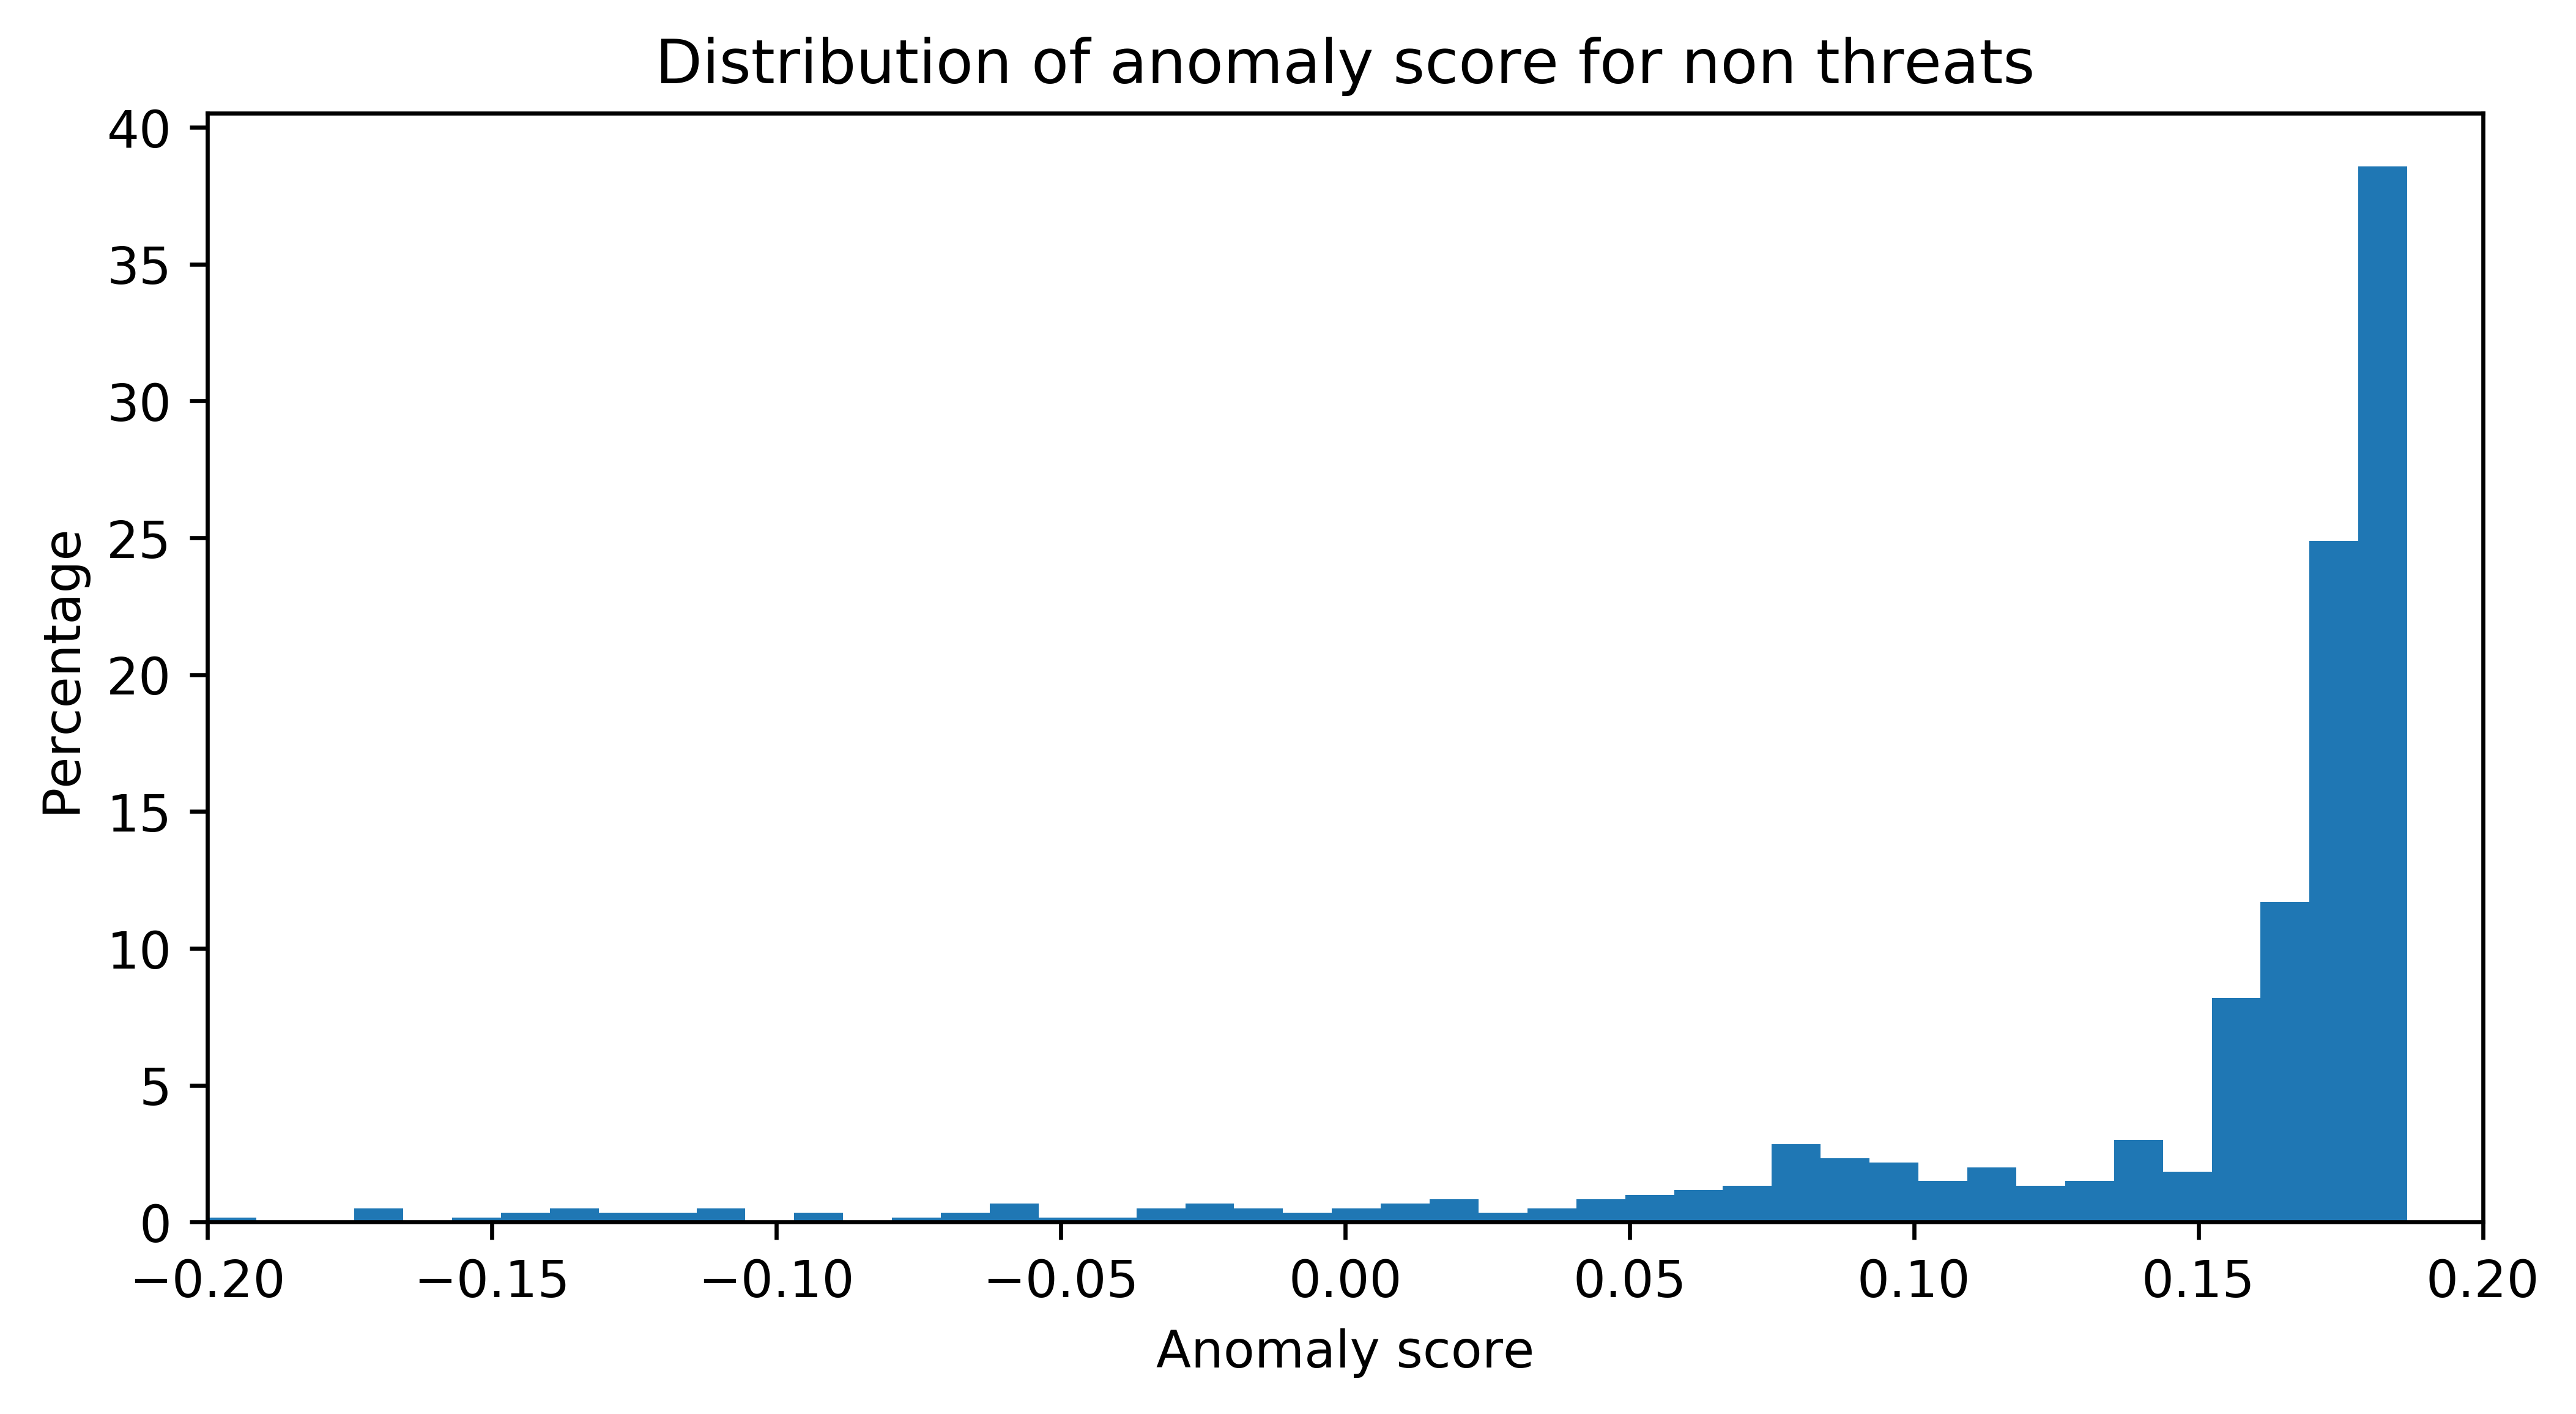

In [150]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 4), dpi=600, facecolor="w", edgecolor="k")

normal = plt.hist(normal_scores, 50, density=True)

plt.xlim((-0.2, 0.2))
plt.xlabel("Anomaly score")
plt.ylabel("Percentage")
plt.title("Distribution of anomaly score for non threats")

In [151]:
anomaly_scores = IF.decision_function(X_train_threat)

Text(0.5, 1.0, 'Distribution of anomaly score for threats')

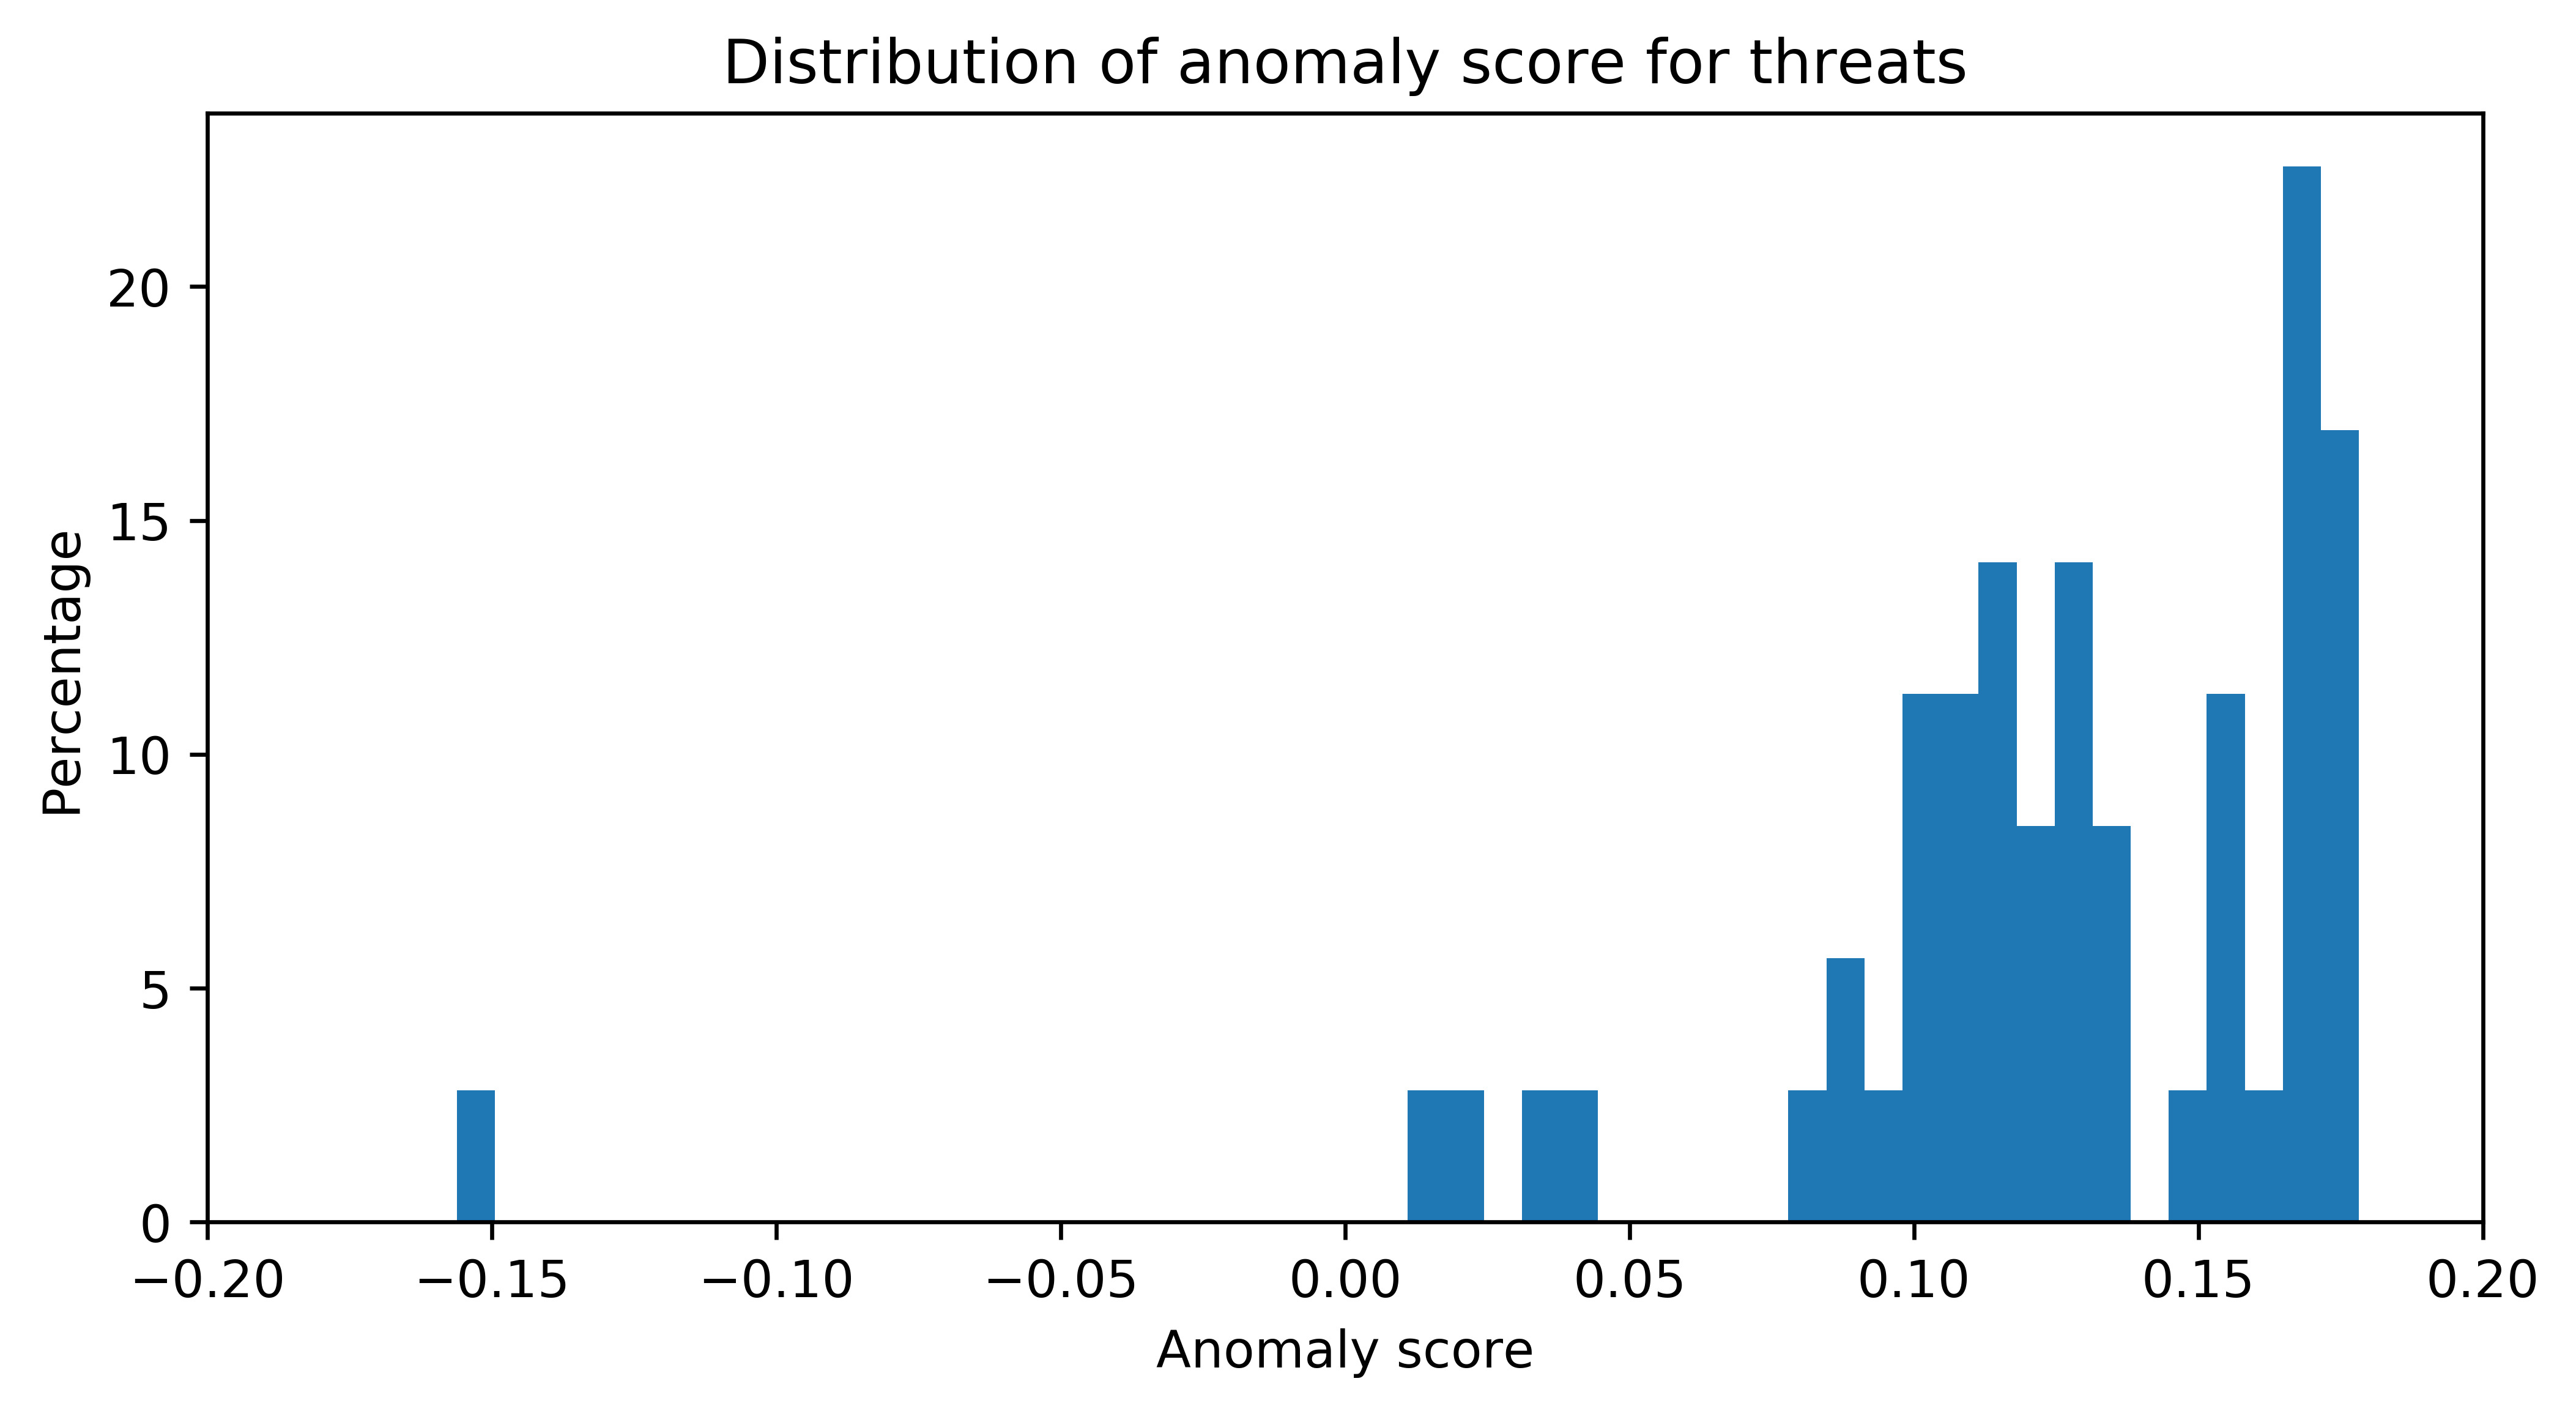

In [152]:
fig = plt.figure(figsize=(8, 4), dpi=600, facecolor="w", edgecolor="k")

anomaly = plt.hist(anomaly_scores, 50, density=True)

plt.xlim((-0.2, 0.2))
plt.xlabel("Anomaly score")
plt.ylabel("Percentage")
plt.title("Distribution of anomaly score for threats")

In [186]:
cutoff = 0.12

In [187]:
from collections import Counter

s = IF.decision_function(X_train_reshaped)
print(Counter(y_train[cutoff > s]))

Counter({0.0: 155, 1.0: 23})


In [188]:
s = IF.decision_function(X_test_reshaped)
print(Counter(y_test[cutoff > s]))

Counter({0.0: 46, 1.0: 8})
